<a href="https://colab.research.google.com/github/King-Bowie/TimeSeries/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capitulo 1: Introdução

Nos gráficos que irão aparecer seguirão o guia de estilo do [Urban Institute Data Visualization](https://urbaninstitute.github.io/graphics-styleguide/)

## Alucar - Analisando as vendas
Neste notebook estou estudando análise de dados temporais, será utilizado a biblioteca Matplotlib e Seaborn.

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  autocorrelation_plot

alucar = pd.read_csv("https://raw.githubusercontent.com/King-Bowie/TimeSeries/main/dados/alucar.csv")
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [49]:
print("Quantidade de linhas e colunas: ", alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [50]:
print('Quantos dados nulos:',alucar.isna().sum().sum() )

Quantos dados nulos: 0


In [51]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [52]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [53]:
sns.__version__

'0.11.2'

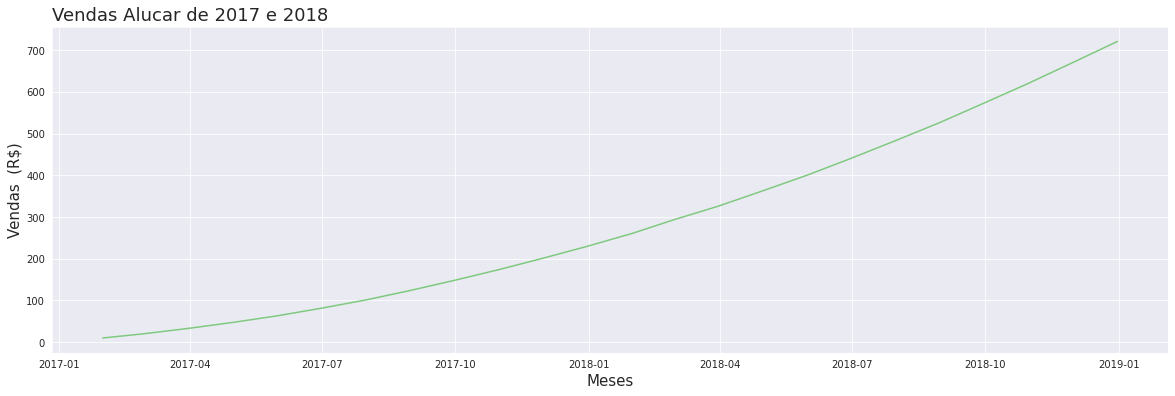

In [54]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left', fontsize=18)
ax.figure.set_size_inches(20,6)
ax.set_xlabel('Meses', fontsize=15)
ax.set_ylabel('Vendas  (R$)', fontsize=15)
plt.show()

In [55]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [56]:
def plotar(titulo, labelx, labely, x, y,dataset):
  ax = sns.lineplot(x=x, y=y, data=dataset)
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax.set_title(titulo,loc='left', fontsize=18)
  ax.figure.set_size_inches(20,6)
  ax.set_xlabel(labelx, fontsize=15)
  ax.set_ylabel(labely, fontsize=15)
  plt.show()

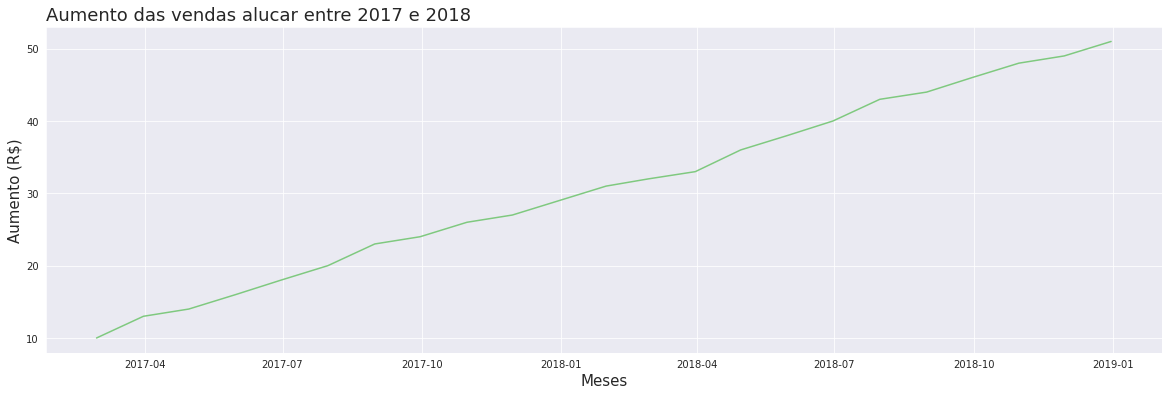

In [57]:
plotar('Aumento das vendas alucar entre 2017 e 2018','Meses','Aumento (R$)',alucar['mes'],alucar['aumento'],alucar)

In [58]:
alucar['crescimento'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,crescimento
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


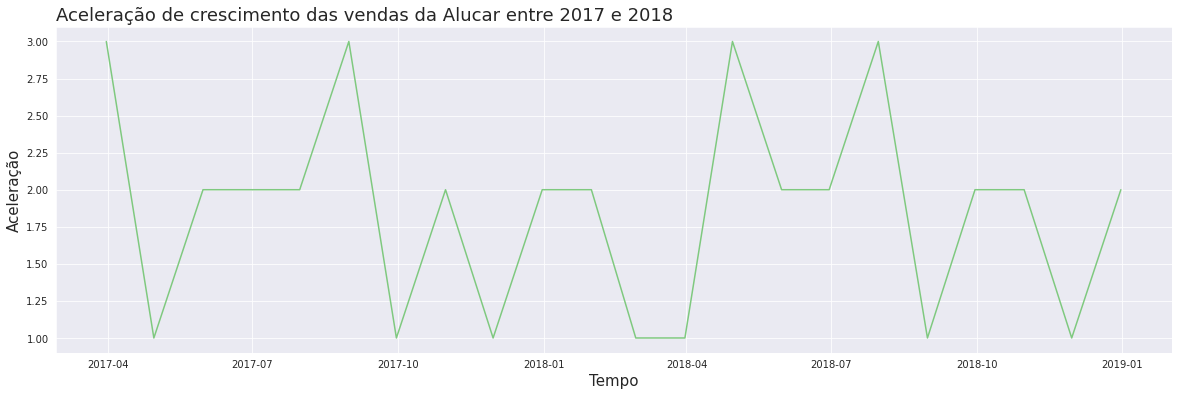

In [59]:
plotar('Aceleração de crescimento das vendas da Alucar entre 2017 e 2018','Tempo','Aceleração','mes','crescimento',alucar)

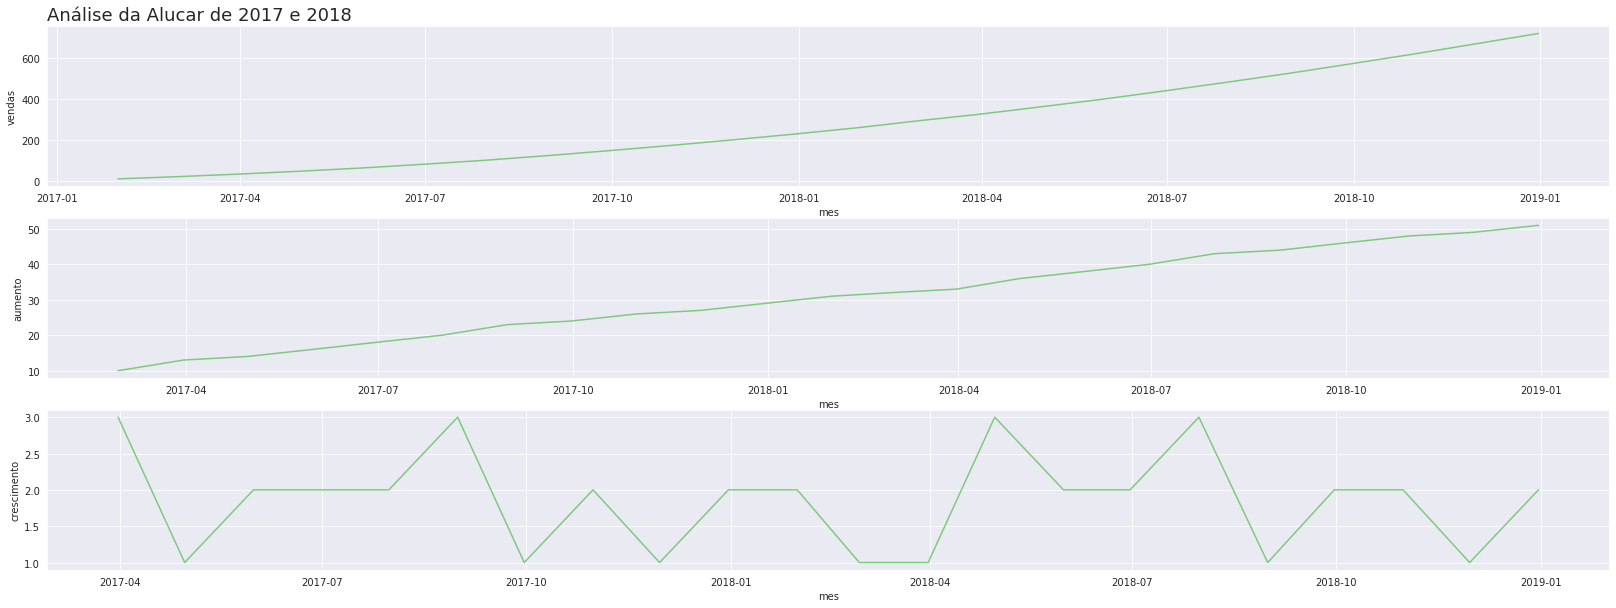

In [60]:
plt.figure(figsize=(28,10))
ax = plt.subplot(3,1,1)
ax.set_title("Análise da Alucar de 2017 e 2018", fontsize=18,loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='crescimento', data=alucar)
plt.show()

In [61]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo1):
  plt.figure(figsize=(28,10))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo1, fontsize=18,loc='left')
  ax = sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2,data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  plt.show()

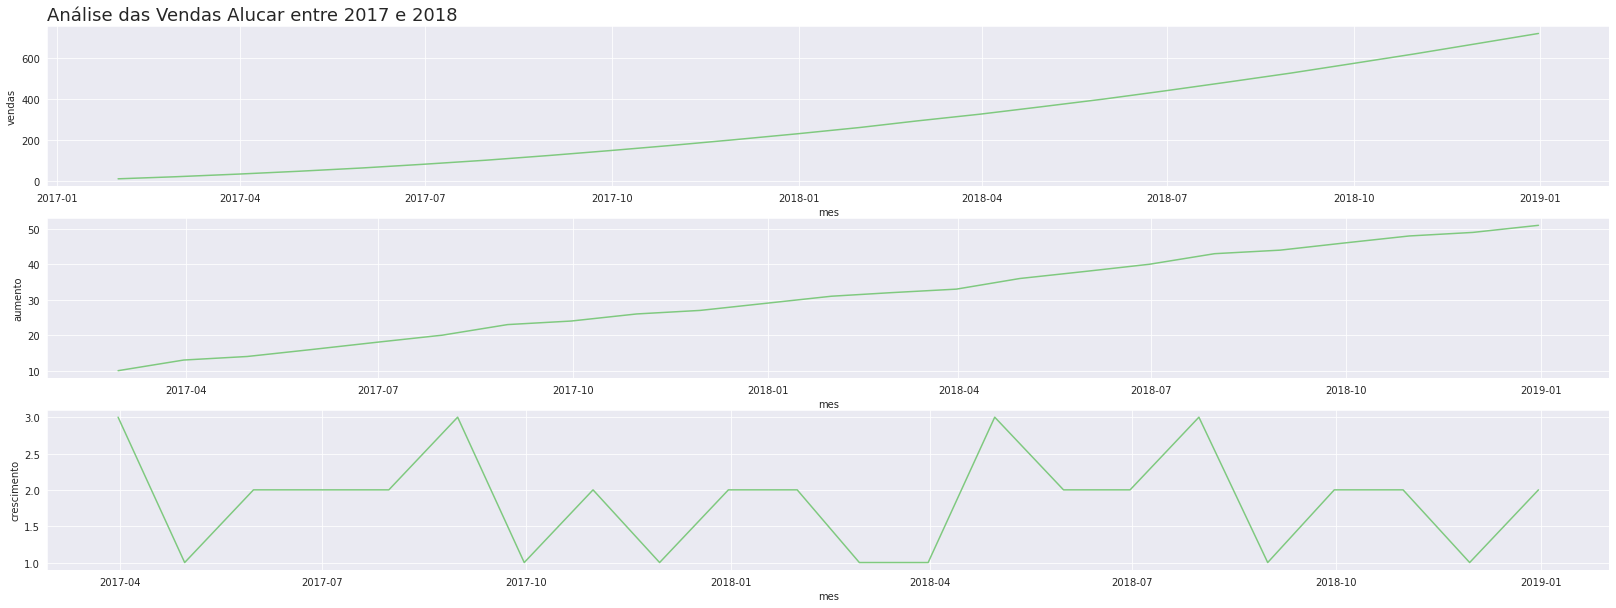

In [62]:
plot_comparacao('mes','vendas','aumento','crescimento',alucar,'Análise das Vendas Alucar entre 2017 e 2018')

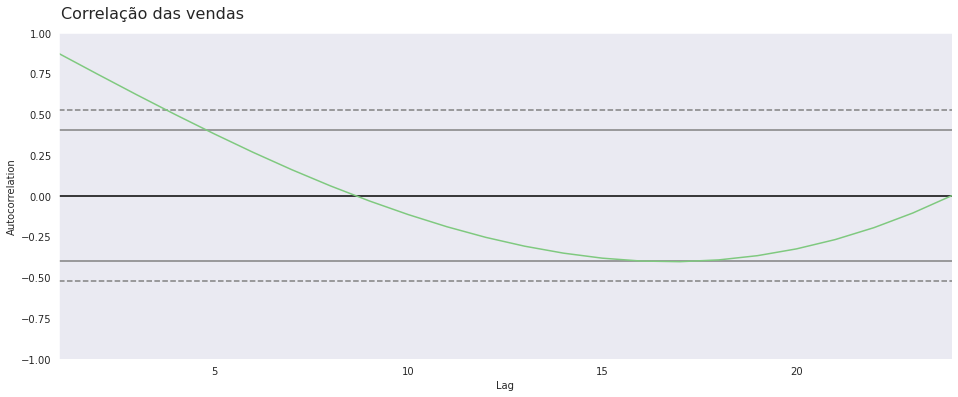

In [63]:
ax = plt.figure(figsize=(16,6))
ax.suptitle('Correlação das vendas', fontsize=16,x=0.206,y=0.941)
autocorrelation_plot(alucar['vendas'])
plt.show()

Neste gráfico conseguimos analisar que há um correlação significativa no lag 1 que com o passar do tempo ela decresce e termina com nulo, podemos reparar tambem que os 7 primeiros dias possuem grande ligação com os da semana passada devido uma grande correlação e com o passar do tempo não temos tanta correlação e teminamos com correlação nula (o valor 1 significa que tempos uma correlação perfeita positiva e -1 uma correlação perfeita negativa) quanto mais proximo de 1 ou -1 significa que temos uma correlação forte

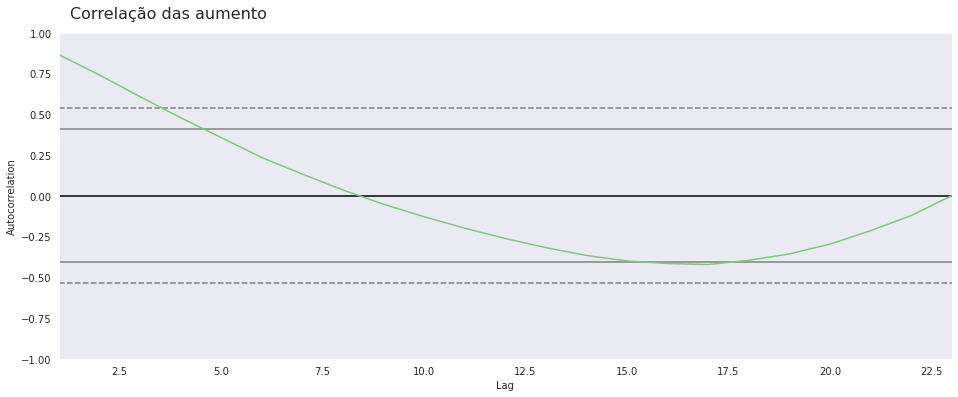

In [64]:
ax = plt.figure(figsize=(16,6))
ax.suptitle('Correlação das aumento', fontsize=16,x=0.22,y=0.941)
autocorrelation_plot(alucar['aumento'][1:])
plt.show()

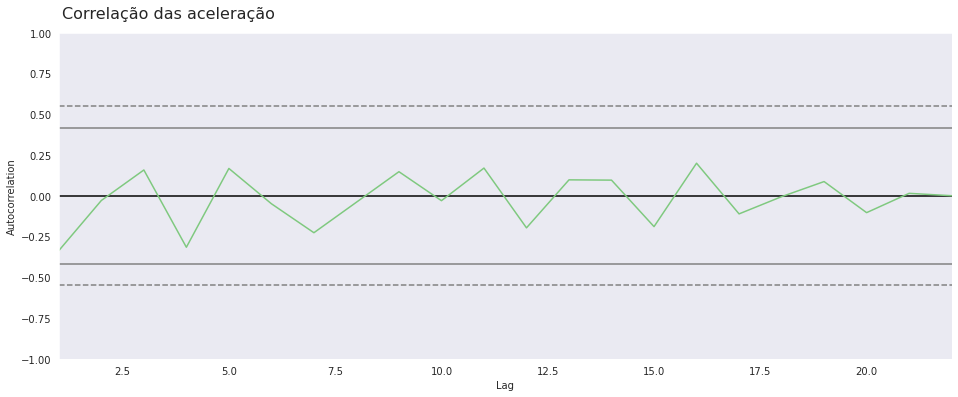

In [65]:
ax = plt.figure(figsize=(16,6))
ax.suptitle('Correlação das aceleração', fontsize=16,x=0.22,y=0.941)
autocorrelation_plot(alucar['crescimento'][2:])
plt.show()


| Autocorrelação | Interpretação     |
|:-------------:|:-------------:|
| 1 | correlação perfeita positiva |
| 0,7 a 0,9 | correlação forte   |
| 0,4 a 0,7 | correlação moderada|
| 0,2 a 0,4 | correlação fraca|
| 0 | correlação nula|
| < 0 | correlação negativa|
| -1 | correlação perfeita negativa|

# Capítulo 2: Newsletter e seu crescimento



In [66]:
assinantes = pd.read_csv('https://raw.githubusercontent.com/King-Bowie/TimeSeries/main/dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [67]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [68]:
print('quantidade de dados nulos:', assinantes.isna().sum().sum())

quantidade de dados nulos: 0


In [69]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [70]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


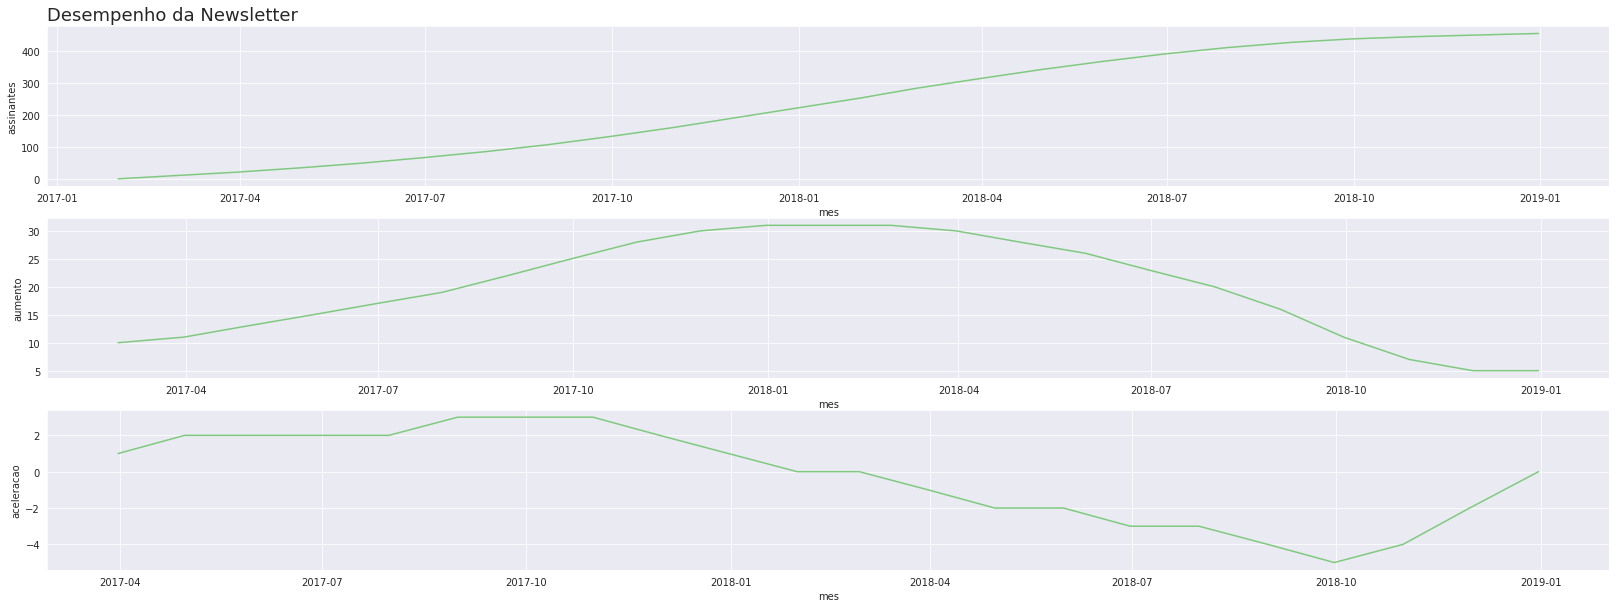

In [71]:
plot_comparacao('mes','assinantes','aumento','aceleracao',
                assinantes,'Desempenho da Newsletter')

# Capítulo 3: Chocolate sabor sazonalidade

Vamos analisar o crescimento e verificar as vendas de chocolate anual e de alguns meses e descobrir um componente geralmente presente nas time series: a Sazonalidade. Além disso, vamos investigar os motivos das sazonalidades presentes nos nossos dados.

In [72]:
chocolate = pd.read_csv('https://raw.githubusercontent.com/King-Bowie/TimeSeries/main/dados/chocolura.csv')
chocolate.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [73]:
print('Quantidade de Dados nulos são:', chocolate.isna().sum().sum())
print('Quantidade de linha e colunas de Dados :', chocolate.shape)

Quantidade de Dados nulos são: 0
Quantidade de linha e colunas de Dados : (24, 2)


In [74]:
chocolate.dtypes

mes       object
vendas     int64
dtype: object

In [75]:
chocolate['mes'] = pd.to_datetime(chocolate['mes'])
chocolate.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [76]:
chocolate['aumento'] = chocolate['vendas'].diff()
chocolate['aceleracao'] =chocolate['aumento'].diff()
chocolate.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


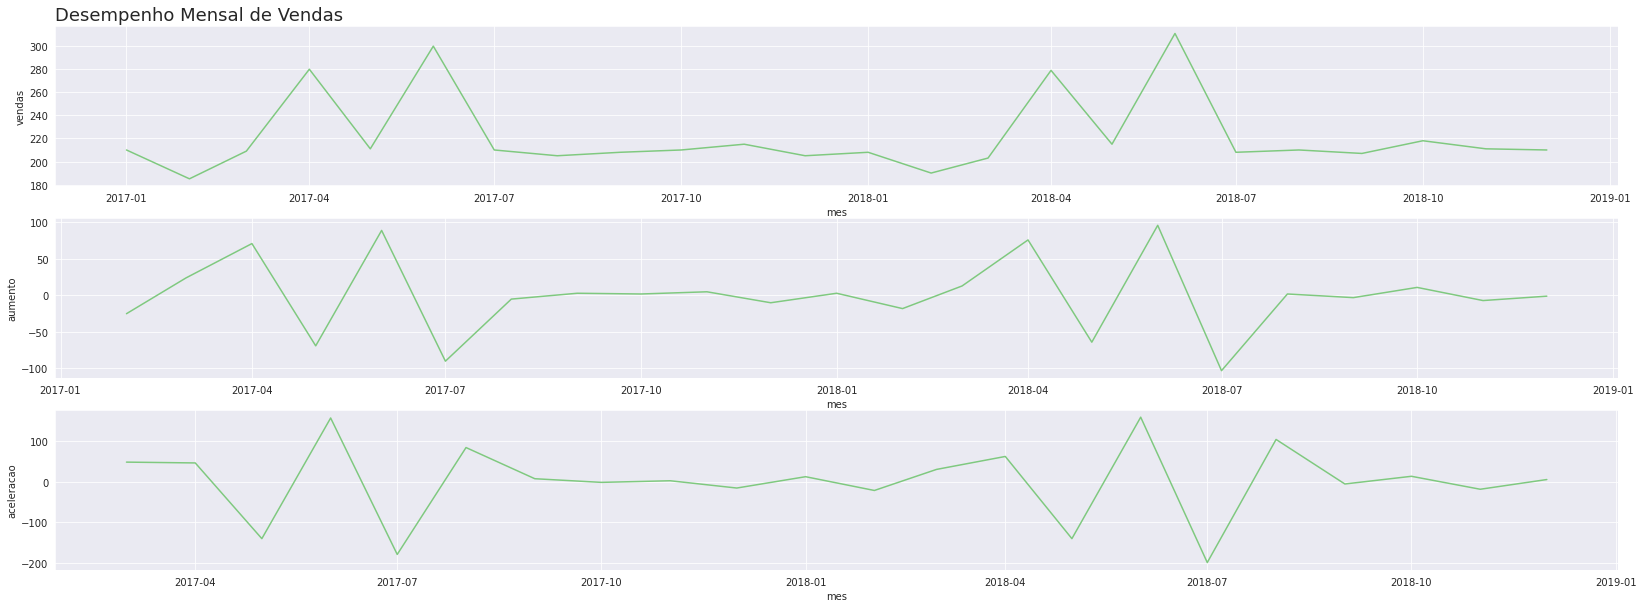

In [77]:
plot_comparacao('mes','vendas','aumento','aceleracao',
                chocolate,'Desempenho Mensal de Vendas')

Conseguimos análisar no periodo de meses que o periodo de sazonalidade causando um grande aumento de vendas nesse caso pode ter uma correlação com feriados como dia dos namorados ou páscoa. 

In [78]:
vendas_diarias = pd.read_csv('https://raw.githubusercontent.com/King-Bowie/TimeSeries/main/dados/vendas_por_dia.csv')
vendas_diarias

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [79]:
print('Quantidade de Dados nulos:', vendas_diarias.isna().sum().sum())
print('Quantidade de linhas e colunas dos dados:', vendas_diarias.shape)

Quantidade de Dados nulos: 0
Quantidade de linhas e colunas dos dados: (61, 2)


In [80]:
vendas_diarias.dtypes

dia       object
vendas     int64
dtype: object

In [81]:
vendas_diarias['dia'] = pd.to_datetime(vendas_diarias['dia'])
vendas_diarias.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [82]:
vendas_diarias['aumento'] = vendas_diarias['vendas'].diff()
vendas_diarias['aceleracao'] = vendas_diarias['aumento'].diff()
vendas_diarias.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


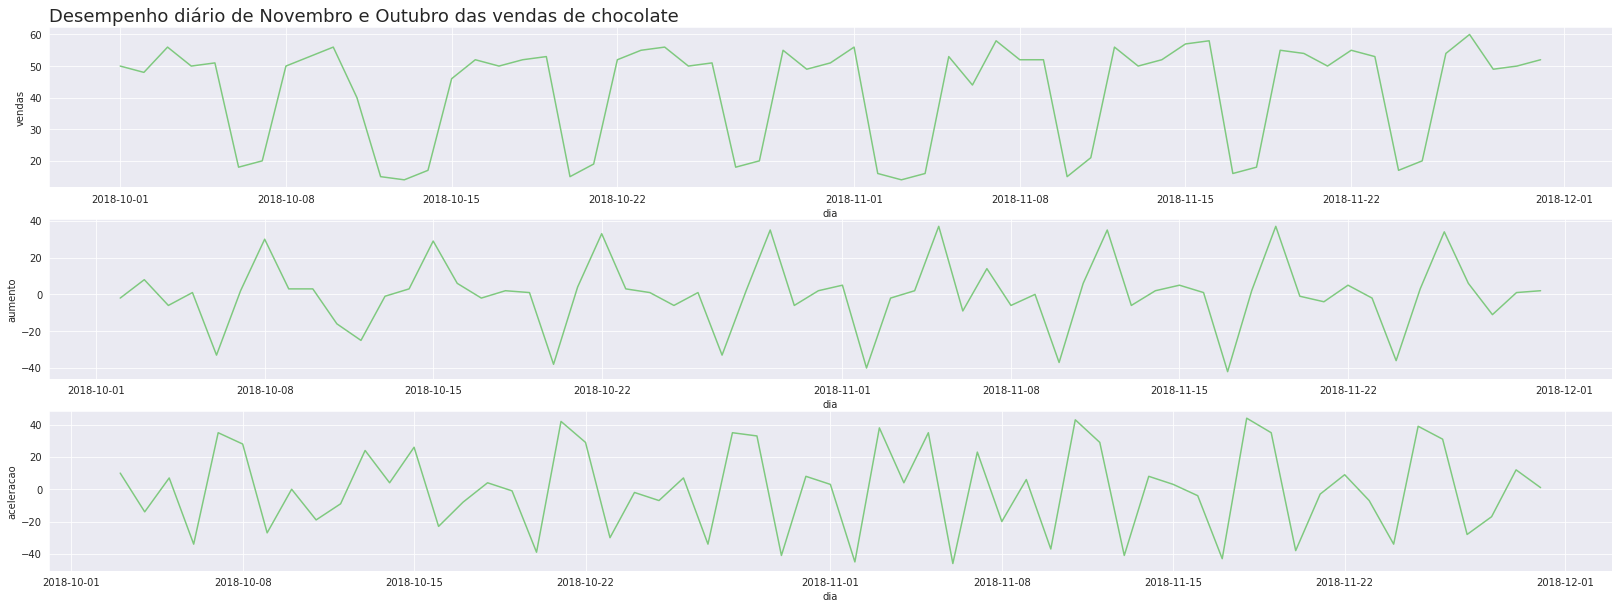

In [83]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_diarias,
                'Desempenho diário de Novembro e Outubro das vendas de chocolate')

In [84]:
vendas_diarias['dia_da_semana'] = vendas_diarias['dia'].dt.day_name()
vendas_diarias.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [85]:
vendas_diarias['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [86]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terca', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta'
                    , 'Saturday': 'Sabado','Sunday': 'Domingo'}

In [87]:
vendas_diarias['dia_da_semana'] = vendas_diarias['dia_da_semana'].map(dias_traduzidos)
vendas_diarias

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terca
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


Agrupando os dias

In [88]:
vendas_agrupadas = vendas_diarias.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


Correlação das vendas diárias

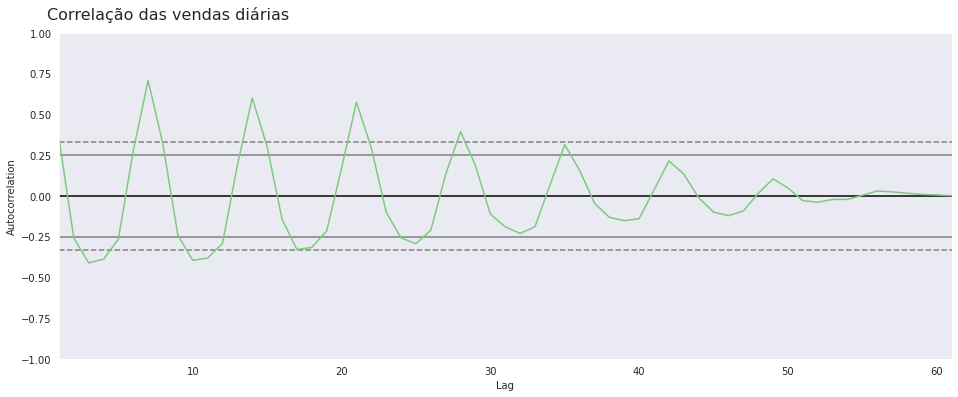

In [89]:
ax = plt.figure(figsize=(16,6))
ax.suptitle('Correlação das vendas diárias', fontsize=16,x=0.22,y=0.941)
autocorrelation_plot(vendas_diarias['vendas'])
plt.show()

linha tracejada = linha de significância

linha contínua = pouca correlação

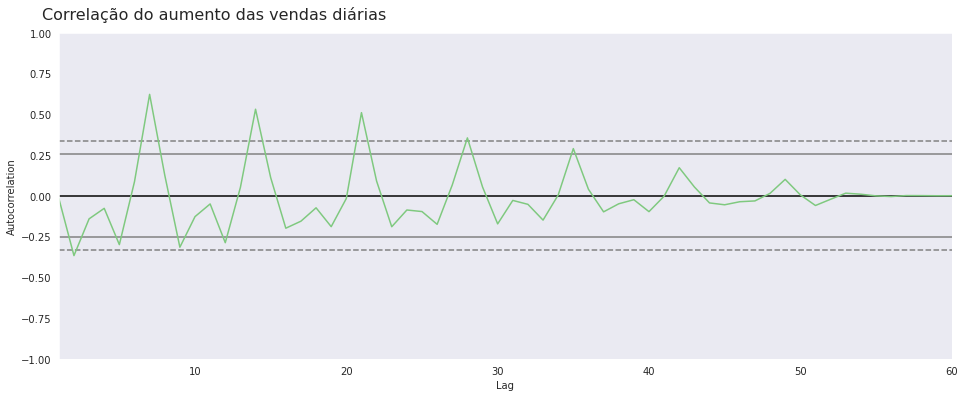

In [93]:
ax1 = plt.figure(figsize=(16,6))
ax1.suptitle('Correlação do aumento das vendas diárias', fontsize=16,x=0.26,y=0.941)
autocorrelation_plot(vendas_diarias['aumento'][1:])
plt.show()

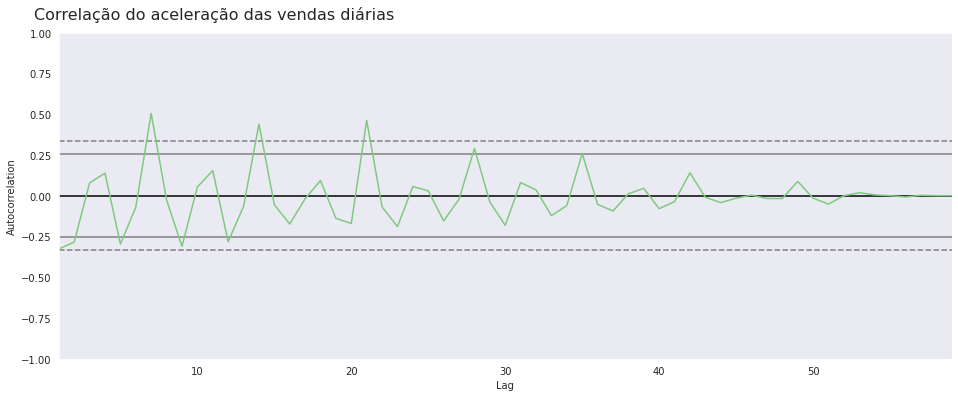

In [96]:
ax = plt.figure(figsize=(16,6))
ax.suptitle('Correlação do aceleração das vendas diárias', fontsize=16,x=0.26,y=0.941)
autocorrelation_plot(vendas_diarias['aceleracao'][2:])
plt.show()

#Capítulo 3: Aceita um Café?

In [97]:
cafe = pd.read_csv('https://raw.githubusercontent.com/King-Bowie/TimeSeries/main/dados/cafelura.csv')
cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [102]:
print('Quantidade de dados em branco :', cafe.isna().sum().sum())
print('Quantidade de dados em linhas e colunas :', cafe.shape)

Quantidade de dados em branco : 3
Quantidade de dados em linhas e colunas : (24, 4)


In [99]:
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [100]:
cafe['mes'] = pd.to_datetime(cafe['mes'])
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [101]:
cafe['aumento'] = cafe['vendas'].diff()
cafe['crescimento'] = cafe['aumento'].diff()
cafe.head()

,mes,vendas,aumento,crescimento
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


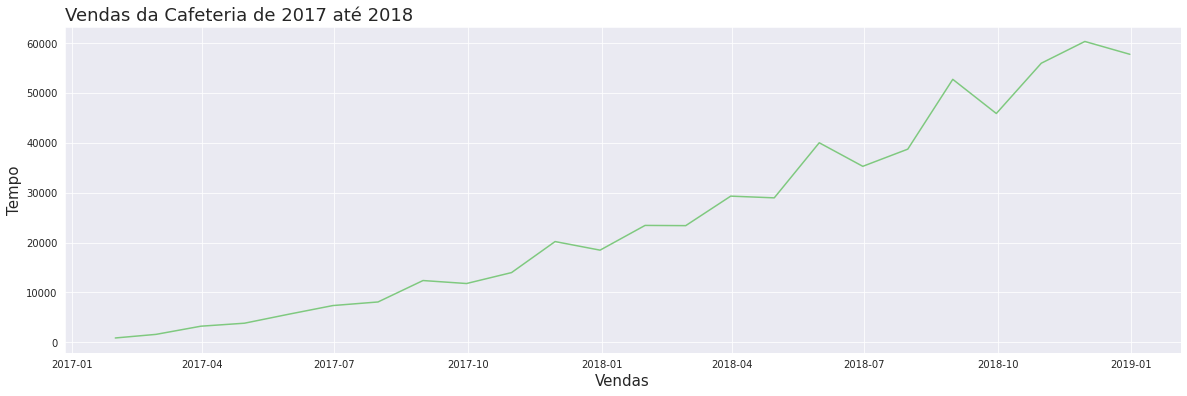

In [108]:
plotar("Vendas da Cafeteria de 2017 até 2018",'Vendas','Tempo','mes','vendas',cafe)